# Test: Verbesserung Labeln 

- create 3-4 verschiedene rois
- data_a mit und ohne labeln jeweils timen

In [23]:
# import
import numpy as np
from matplotlib import pyplot as plt
from data_analyzer import DataAnalyzer

### Rois

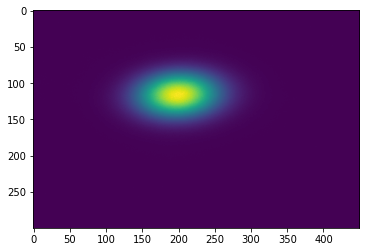

(300, 450)


In [24]:
# create data
with open('D:\\HZB\\Camera_Data\\mls13\\1test.npy', 'rb') as f:
        data = np.load(f)
data = data.reshape(1456, 1936)
roi = data[(slice(600, 900, None),
            slice(800, 1250, None))]
plt.imshow(roi, cmap='viridis')
plt.show()
print(roi.shape)

init_roi= {'control_params_values':
                    {'roi_x_start': 800,
                    'roi_x_stop': 1250,
                    'roi_y_start': 600,
                    'roi_y_stop': 900,
                    'factor': 0.1,
                    'median_flt': True}}

### Datenanalyse

In [25]:
    class fake_CamDatEps:
        def __init__(self):
            self.index = 1
            self.image = self.get_current_image()

            init = init_roi

            init['control_params_values']['sampled'] = 1
            self.data_analyzer_no_sampling = DataAnalyzer(self, init)

            init['control_params_values']['sampled'] = 5
            self.data_analyzer_sampling_5 = DataAnalyzer(self, init)

            init['control_params_values']['sampled'] = 25
            self.data_analyzer_sampling_25 = DataAnalyzer(self, init)

            init['control_params_values']['sampled'] = 50
            self.data_analyzer_sampling_50 = DataAnalyzer(self, init)

            init['control_params_values']['sampled'] = 70
            self.data_analyzer_sampling_70 = DataAnalyzer(self, init)

            init['control_params_values']['sampled'] = 100
            self.data_analyzer_sampling_100 = DataAnalyzer(self, init)

            init['control_params_values']['sampled'] = 200
            self.data_analyzer_sampling_200 = DataAnalyzer(self, init)

            init['control_params_values']['sampled'] = 300
            self.data_analyzer_sampling_300 = DataAnalyzer(self, init)

            init['control_params_values']['sampled'] = 1000
            self.data_analyzer_sampling_1000 = DataAnalyzer(self, init)
    
        def get_image(self):
            return self.image

        def get_current_image(self):
            try:
                with open('D:\\HZB\\Camera_Data\\mls13\\'+str(self.index)+'test.npy', 'rb') as f:
                        image = np.load(f)
                return image.reshape(1456, 1936)
            except:
                print("no image loaded")
                return None
        
        def next_image(self):
            self.index+=1
            self.get_current_image()
            
        def set_da_error(self, error_message):
            if error_message is not None:
                print(error_message)


In [26]:
cam_dat_eps = fake_CamDatEps()

### Compare

In [27]:
cam_dat_eps.next_image()

14 ms ± 501 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.52874002e+04 1.16733505e+02 6.15628125e+01 3.82081786e+01
 2.08181675e+01 4.65772391e-02 1.36635193e+02]
dif: 4979.0


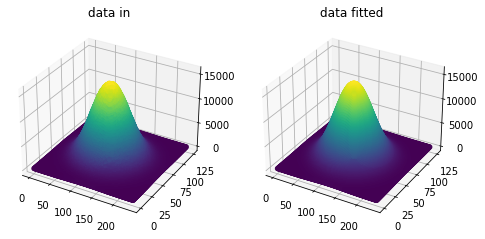

In [28]:
%timeit cam_dat_eps.data_analyzer_no_sampling.analyze()
cam_dat_eps.data_analyzer_no_sampling.get_fit_params()
cam_dat_eps.data_analyzer_no_sampling.g_fit.show()

7.47 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.52881992e+04 1.16727987e+02 6.15567706e+01 3.82036286e+01
 2.08233330e+01 4.60863221e-02 1.36347903e+02]
dif: 5038.0


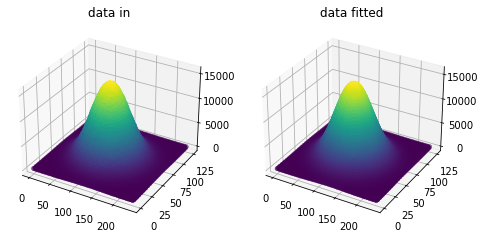

In [29]:
%timeit cam_dat_eps.data_analyzer_sampling_5.analyze()
cam_dat_eps.data_analyzer_sampling_5.get_fit_params()
cam_dat_eps.data_analyzer_sampling_5.g_fit.show()

6.06 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.53023265e+04 1.16694633e+02 6.15756474e+01 3.82007976e+01
 2.08064295e+01 4.57479798e-02 1.37159813e+02]
dif: 5077.0


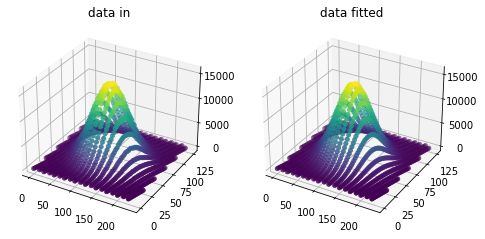

In [30]:
%timeit cam_dat_eps.data_analyzer_sampling_25.analyze()
cam_dat_eps.data_analyzer_sampling_25.get_fit_params()
cam_dat_eps.data_analyzer_sampling_25.g_fit.show()

6.1 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.52835274e+04 1.16713164e+02 6.15715053e+01 3.81968064e+01
 2.08241999e+01 4.45848425e-02 1.36488376e+02]
dif: 5436.0


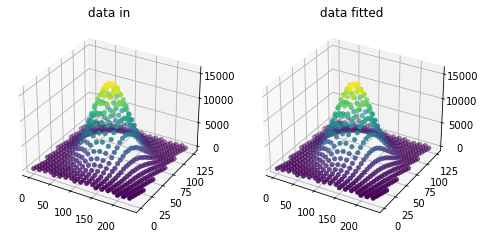

In [31]:
%timeit cam_dat_eps.data_analyzer_sampling_50.analyze()
cam_dat_eps.data_analyzer_sampling_50.get_fit_params()
cam_dat_eps.data_analyzer_sampling_50.g_fit.show()

6.04 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.52850944e+04 1.16724849e+02 6.15655617e+01 3.81694132e+01
 2.08591728e+01 4.57284308e-02 1.35023466e+02]
dif: 5488.0


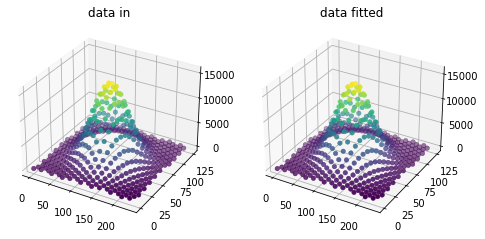

In [32]:
%timeit cam_dat_eps.data_analyzer_sampling_70.analyze()
cam_dat_eps.data_analyzer_sampling_70.get_fit_params()
cam_dat_eps.data_analyzer_sampling_70.g_fit.show()

5.93 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.52659283e+04 1.16747070e+02 6.15750208e+01 3.82709924e+01
 2.08258305e+01 4.60363931e-02 1.34950155e+02]
dif: 5330.0


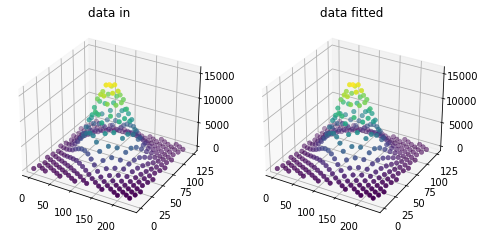

In [33]:
%timeit cam_dat_eps.data_analyzer_sampling_100.analyze()
cam_dat_eps.data_analyzer_sampling_100.get_fit_params()
cam_dat_eps.data_analyzer_sampling_100.g_fit.show()

5.88 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.52680105e+04 1.16754112e+02 6.16158525e+01 3.83205356e+01
 2.08575690e+01 4.53170398e-02 1.30887583e+02]
dif: 5720.0


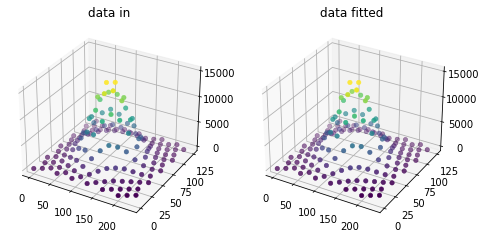

In [34]:
%timeit cam_dat_eps.data_analyzer_sampling_200.analyze()
cam_dat_eps.data_analyzer_sampling_200.get_fit_params()
cam_dat_eps.data_analyzer_sampling_200.g_fit.show()

5.87 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.52663881e+04 1.16781747e+02 6.15577248e+01 3.82076210e+01
 2.08620822e+01 4.67036823e-02 1.35357425e+02]
dif: 5322.0


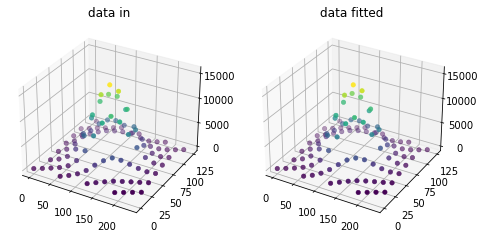

In [35]:
%timeit cam_dat_eps.data_analyzer_sampling_300.analyze()
cam_dat_eps.data_analyzer_sampling_300.get_fit_params()
cam_dat_eps.data_analyzer_sampling_300.g_fit.show()

5.91 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[1.53127978e+04 1.16634581e+02 6.15940413e+01 3.83113990e+01
 2.08600086e+01 4.73702941e-02 1.33673216e+02]
dif: 4749.0


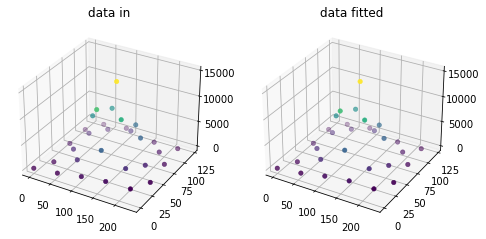

In [36]:
%timeit cam_dat_eps.data_analyzer_sampling_1000.analyze()
cam_dat_eps.data_analyzer_sampling_1000.get_fit_params()
cam_dat_eps.data_analyzer_sampling_1000.g_fit.show()

# Plot

In [ ]:
result = [[1000,5.91],
          [300,5.87],
          [200,5.88],
          [100,5.93],
          [70,6.04],
          [50,6.1]
          